# Guided Capstone Step 3 Exploratory Data Analysis

This is the third step in the Data Science Method. We introduced this topic in the last subunit. With Data Wrangling out of the way we can progress to the Exploratory Data Analysis section. In this exercise, you will learn to build data profiles and plots, including relationship plot and data correlation plot. You will also implement k-means clustering, complete clusters, and update data frame as a CSV file. Let's get started! 
  
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as we did in step 2 and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
#load python packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**<font color='teal'> If you need to change your path refer back to step 2 on how to do that. Then load the csv file you created in step 2, remember it should be saved inside your data subfolder and print the first five rows.</font>**

In [2]:
df = pd.read_csv('/Users/Sue/Documents/study2020/springboard/Step 2/data/step2_output.csv')
df.head()

,Unnamed: 0,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0
2,2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0
4,4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0.0,0,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


# Build data profile tables and plots 

**<font color='teal'> Print out the summary stats table transposed to fit on the screen using the `describe()` function.</font>**

In [3]:
df.dtypes

Unnamed: 0             int64
Name                  object
Region                object
state                 object
summit_elev            int64
vertical_drop          int64
base_elev              int64
trams                  int64
fastEight            float64
fastSixes              int64
fastQuads              int64
quad                   int64
triple                 int64
double                 int64
surface                int64
total_chairs           int64
Runs                 float64
TerrainParks         float64
LongestRun_mi        float64
SkiableTerrain_ac    float64
Snow Making_ac       float64
daysOpenLastYear     float64
yearsOpen            float64
averageSnowfall      float64
AdultWeekday         float64
AdultWeekend         float64
projectedDaysOpen    float64
NightSkiing_ac       float64
dtype: object

**<font color='teal'> Histograms are an excellent way to review the range and density of values for each numeric features in your data set and build data profiles. Plot the histograms for all numeric features and adjust the bins size to 25.</font>**

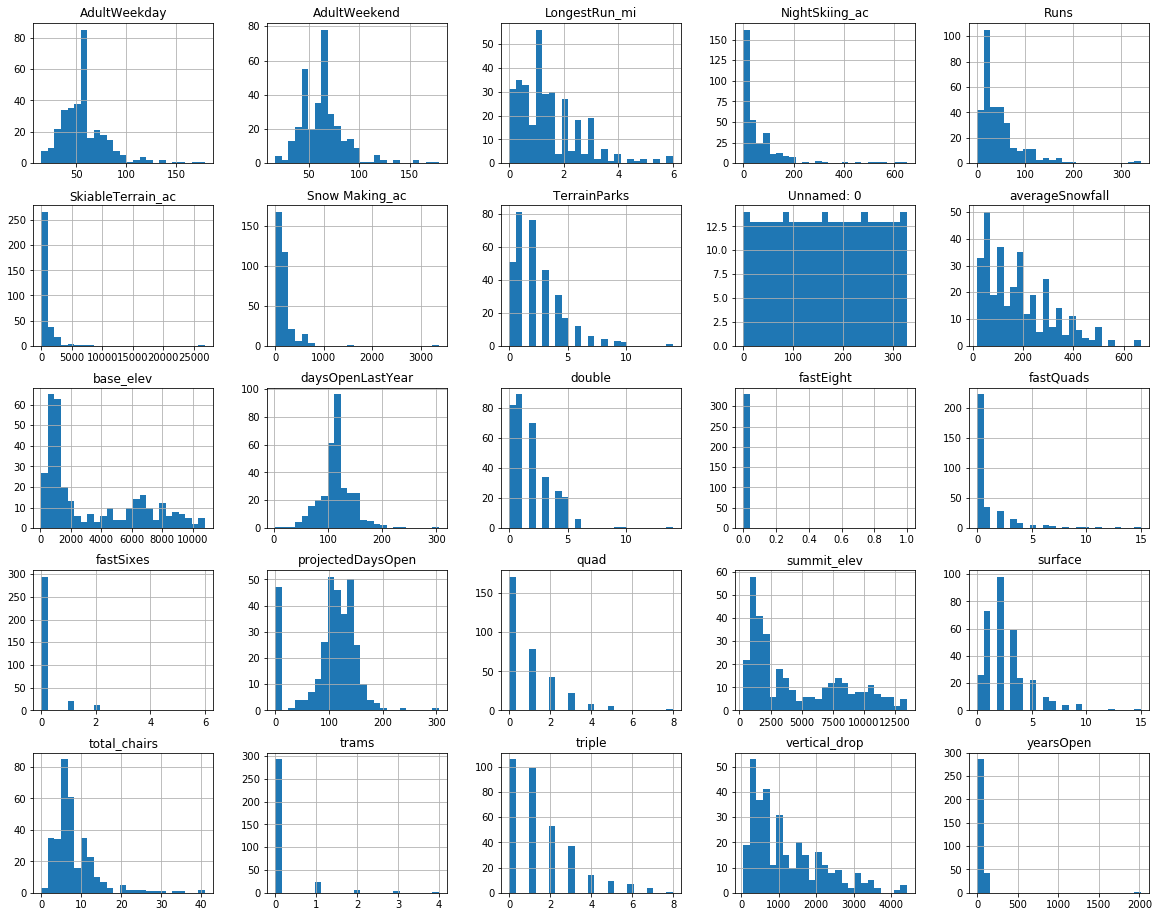

In [4]:
#ax=df.select_dtypes(include = ['float64','int64']).plot.hist(bins=25,subplots = True,layout = (7,4),figsize=(20,16))
ax=df.select_dtypes(include = ['float64','int64']).hist(bins=25,figsize=(20,16))
#ax[0,0].set_xlim(0,1000)

Look for similarities in the features that may indicate that they are duplicates or highly correlated features. Make a note of your findings and any other interesting insights you find about these numeric features.

**<font color='teal'> Okay, now you should be getting a sense for what the data look like. Let's create a barplot for the categorical features `Region` and `state` where the heights of the bars are the counts of each level in that variable. </font>**

**<font color='teal'>State Levels Plot</font>**

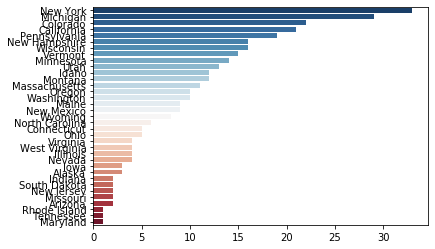

In [5]:
# Uncomment the following code to get your visualization started 
# f, ax = plt.subplots(figsize=(10, 10))

# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(df.state.value_counts())
#print(df.state)
# Get the state names by calling list() on the x.index
names = list(x.index)

# Get the values by plugging x.state into the list() function
values = list(x.state)

# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r")

**<font color='teal'>Region Levels Plot</font>**

In [6]:
# Now do the same for regions! 

By reviewing the State and Regions counts plots you should notice that the Region feature is nearly identical to the state and therfore we can remove from the dataframe.**<font color='teal'> Remove the `Region` column using the drop function.</font>**

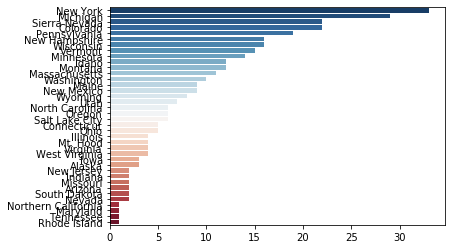

In [7]:
# In the following brackets, we want the value_counts() of the states 
x1 = pd.DataFrame(df.Region.value_counts())

# Get the state names by calling list() on the x.index
names1 = list(x1.index)

# Get the values by plugging x.state into the list() function
values1 = list(x1.Region)

# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values1, y=names1, palette="RdBu_r")

## Anamolies & Outliers - Review boxplots

**<font color='teal'> Print boxplot for every column</font>**

Hint: you'll see the methodology here in this article on Exploratory Data Analysis [here](nce-method-dsm-exploratory-data-analysis-bc84d4d8d3f9). 

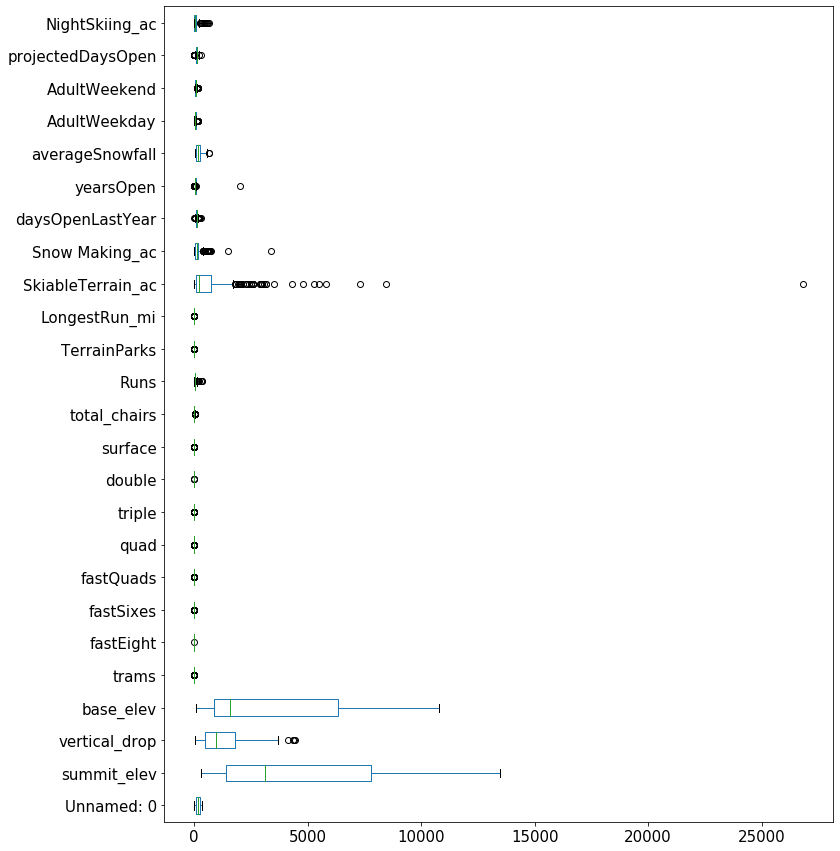

In [8]:
boxplot = df.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))
#ax=df.select_dtypes(include = ['float64','int64']).plot.box(subplots = True,layout = (7,4),figsize=(20,16))
#ax[0,0].set_xlim(0,1000)

After reviewing these respons varible distributions, there doesn't appear to be any data issues to mitigate. Now, we move on to investigating feature relationship and interactions between the features the response.

# Explore data relationships

<font color='teal'>**Create pairplots or what is commonly referred to as biplots**</font>

Hint: pairplots are covered in this article on EDA [here](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-exploratory-data-analysis-bc84d4d8d3f9). 

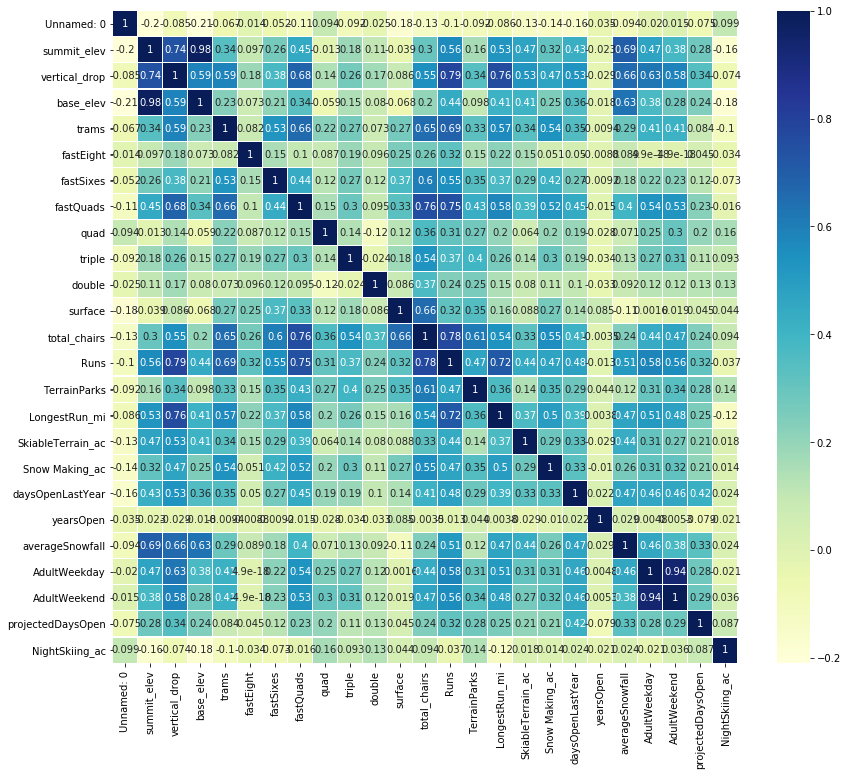

In [9]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [10]:
#pair = sns.pairplot(df)
dfno = df

# Identification and creation of features

<font color='teal'>**Create a Pearson correlation heatmap**</font>

In [11]:
#Calculate the correlation coefficients
corr =dfno.corr(method = 'pearson')
#plot it in the next line
corr.round(2).style.background_gradient(cmap='coolwarm')
#corr.head()

,Unnamed: 0,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
Unnamed: 0,1.000000,-0.200000,-0.080000,-0.210000,-0.070000,-0.010000,-0.050000,-0.110000,0.090000,-0.090000,-0.020000,-0.180000,-0.130000,-0.100000,-0.090000,-0.090000,-0.130000,-0.140000,-0.160000,-0.040000,-0.090000,-0.020000,0.020000,-0.080000,0.100000
summit_elev,-0.200000,1.000000,0.740000,0.980000,0.340000,0.100000,0.260000,0.450000,-0.010000,0.180000,0.110000,-0.040000,0.300000,0.560000,0.160000,0.530000,0.470000,0.320000,0.430000,-0.020000,0.690000,0.470000,0.380000,0.280000,-0.160000
vertical_drop,-0.080000,0.740000,1.000000,0.590000,0.590000,0.180000,0.380000,0.680000,0.140000,0.260000,0.170000,0.090000,0.550000,0.790000,0.340000,0.760000,0.530000,0.470000,0.530000,-0.030000,0.660000,0.630000,0.580000,0.340000,-0.070000
base_elev,-0.210000,0.980000,0.590000,1.000000,0.230000,0.070000,0.210000,0.340000,-0.060000,0.150000,0.080000,-0.070000,0.200000,0.440000,0.100000,0.410000,0.410000,0.250000,0.360000,-0.020000,0.630000,0.380000,0.280000,0.240000,-0.180000
trams,-0.070000,0.340000,0.590000,0.230000,1.000000,0.080000,0.530000,0.660000,0.220000,0.270000,0.070000,0.270000,0.650000,0.690000,0.330000,0.570000,0.340000,0.540000,0.350000,-0.010000,0.290000,0.410000,0.410000,0.080000,-0.100000
fastEight,-0.010000,0.100000,0.180000,0.070000,0.080000,1.000000,0.150000,0.100000,0.090000,0.190000,0.100000,0.250000,0.260000,0.320000,0.150000,0.220000,0.150000,0.050000,0.050000,-0.010000,0.090000,0.000000,-0.000000,0.040000,-0.030000
fastSixes,-0.050000,0.260000,0.380000,0.210000,0.530000,0.150000,1.000000,0.440000,0.120000,0.270000,0.120000,0.370000,0.600000,0.550000,0.350000,0.370000,0.290000,0.420000,0.270000,-0.010000,0.180000,0.220000,0.230000,0.120000,-0.070000
fastQuads,-0.110000,0.450000,0.680000,0.340000,0.660000,0.100000,0.440000,1.000000,0.150000,0.300000,0.100000,0.330000,0.760000,0.750000,0.430000,0.580000,0.390000,0.520000,0.450000,-0.020000,0.400000,0.540000,0.530000,0.230000,-0.020000
quad,0.090000,-0.010000,0.140000,-0.060000,0.220000,0.090000,0.120000,0.150000,1.000000,0.140000,-0.120000,0.120000,0.360000,0.310000,0.270000,0.200000,0.060000,0.200000,0.190000,-0.030000,0.070000,0.250000,0.300000,0.200000,0.160000
triple,-0.090000,0.180000,0.260000,0.150000,0.270000,0.190000,0.270000,0.300000,0.140000,1.000000,-0.020000,0.180000,0.540000,0.370000,0.400000,0.260000,0.140000,0.300000,0.190000,-0.030000,0.130000,0.270000,0.310000,0.110000,0.090000


When reviewing the Pearson correlation coefficient heatmap, you can see substantial differences in the correlations compared to the response variable(s) as well as in the features when compared to each other. The heatmap helps identify features that suffer from multi-collinearity. 

<font color='teal'>**Use the correlation matrix displayed in the heatmap to select and remove collinear features. Remember to exclude the response variable(s) from the matrix to ensure they are retained in your final model development dataset. Then select those features that are more than 95% correlated for removal.**</font>

Step 1: Create a correlation matrix that excludes your response variables. 

Step 2: Select the upper triangle of the correlation matrix. This is because a correlation matrix actually contains the same information, twice over!

Step 3: Find the index of feature columns with a correlation greater than 0.95.

In [12]:
# Step 1. Call the variable corr_matrix
corr_matrix = dfno.drop(['total_chairs','AdultWeekend','AdultWeekday','projectedDaysOpen'], axis=1).corr().abs()

# Step 2. Uncomment the following code to get the upper triangle of the correlation matrix 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Step 3. This code iterates through our columns and gets the index of any that have a correlation > 0.95
# Call the variable to_drop, get the columns of our 'upper' variable, make sure the threshold is 0.95.
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [13]:
# Let's see those features! 
print('Features selected to drop include:',to_drop)

Features selected to drop include: ['base_elev']


In [14]:
print('Reduced dataframe size: ',dfno.drop(dfno[to_drop], axis=1).shape)

Reduced dataframe size:  (330, 27)


In [15]:
# Now replace dfno by the result of dropping the columns in the to_drop variable from it
dfno = dfno.drop(dfno[to_drop], axis=1)

Now we address the feature creation piece of this step. We can create additional features through many methods such as: combining several features, grouping features into bins, or even by applying an unsupervised classification algorithm, such as k-means clustering and using the clusters as features in our model development dataset.

Clustering essentially finds patterns in data when we don't know in advance what we're looking for. The K-means algorithm is one way of doing clustering. It puts our data into groups (or 'clusters') which can then become features for further analysis. What the k-means algorithm outputs, though, depends on the number of clusters we set out to have. We will use a method called 'Elbow plotting' to determine this number. 

We will cover clustering and k-means thoroughly in the Unsupervised Learning unit of this course, but for now, we'll use it for feature creation alone, which is an integral part of Exploratory Data Analysis. Don't worry if you don't understand the details just yet. 

Run the next two cells below to create an Elbow plot. The Elbow plot is a diagnostic tool that helps us determine the number of clusters to include in our k-means clustering implementation. 

In this example, the error between clusters and within clusters is compared for a range of 1 to 11 clusters, and it appears the elbow is between two and four, therefore we set the parameter k = 3.

In [16]:
from sklearn.cluster import KMeans
x = dfno.drop(['Name','Region','state'], axis =1).values

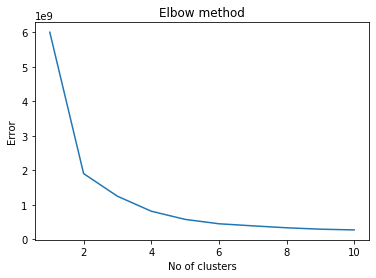

In [17]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

<font color='teal'>**Fit the kmeans algorithm with the k parameter set to three and plot the results.**</font>

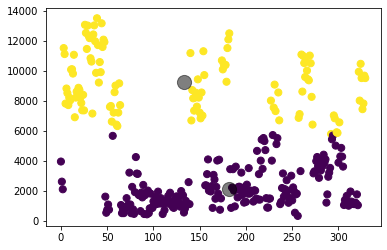

In [18]:
# This code will fit the k-means algorithm with our k parameter set to three, and plot the results. Cool, huh? 
kmeans3 = KMeans(n_clusters=2)
y_kmeans3 = kmeans3.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=50, cmap='viridis')

centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


In [19]:
print(y_kmeans3)

[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


<font color='teal'>**Add the clusters to your dataframe as a new column to include in the next step and write the updated dataframe out as csv. Save the dataframe in the data folder and name it `step3_output.csv`.**</font>

In [20]:
# Make a new column in your dfno dataframe called 'clusters', and assign it the variable: y_kmeans3
dfno['clusters']=y_kmeans3

In [21]:
# Write your dataframe to csv 
dfno.to_csv('/Users/Sue/Documents/study2020/springboard/Step 2/data/step3_output.csv')